In [32]:
import numpy as np    #Biblioteca matemática
import pandas as pd   #Biblioteca para manipulação de dados
import matplotlib.pyplot as plt #Biblioteca gráfica

In [64]:
#Busca dos dados (DUAS UNAS DATASET)
base_path = './dataset/duas_unas/hours/'
path = f'{base_path}grouped_48_hours.csv'
dados = pd.read_csv(path,sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

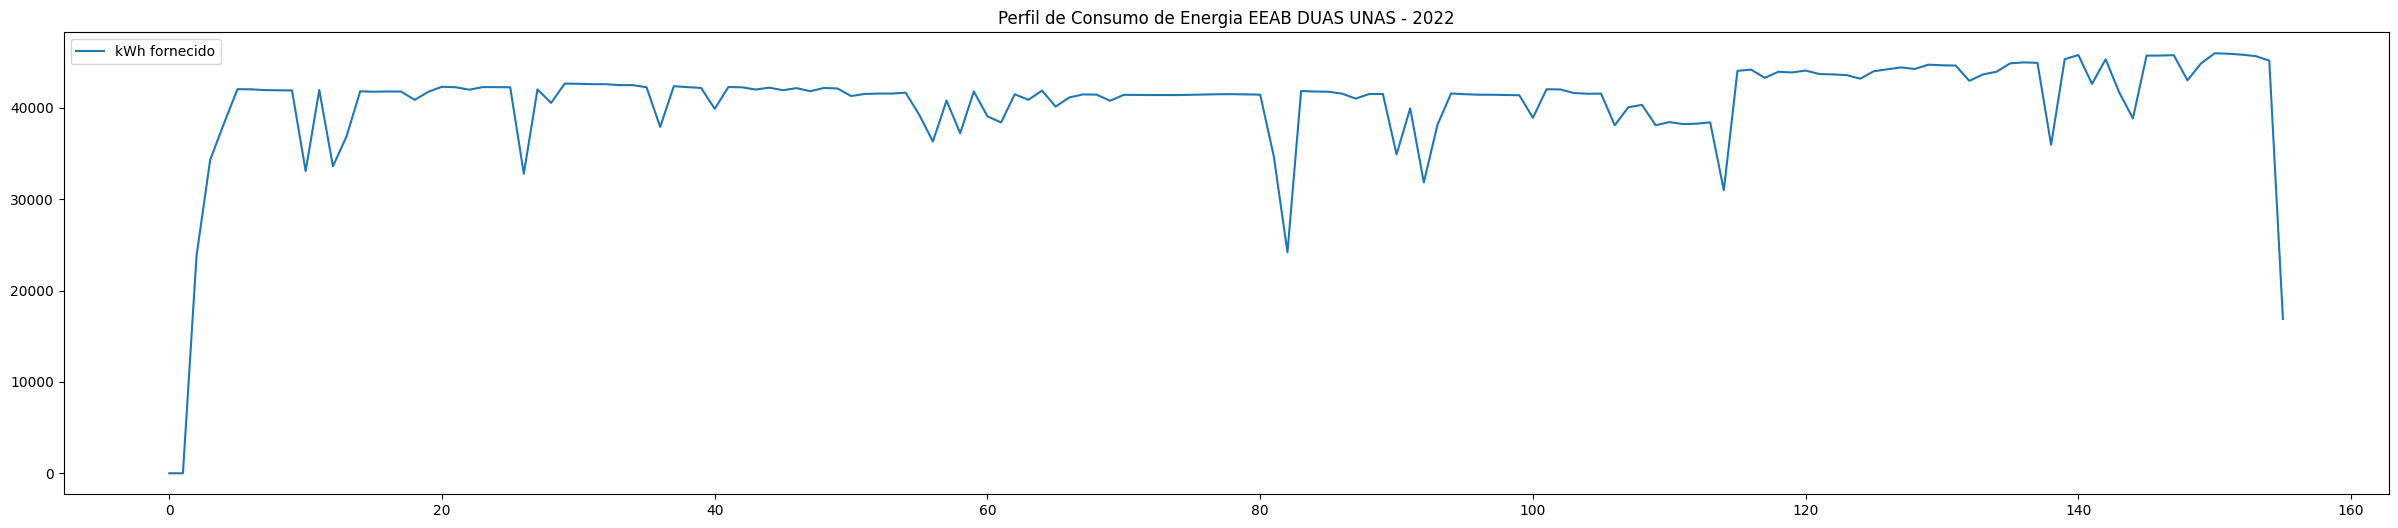

In [65]:
#Plotar gráfico para visualização dos dados
dados['kWh fornecido'].astype(float)
dados.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

In [ ]:
# Função para agrupar dados por dias e horas
def group_data(df, days, hours):
    # Resample para dados diários
    daily_resample = df.resample(f'{days}D').sum()  # Pode mudar para sum() ou outra função de agregação
    # Para cada hora, podemos recortar um subset da granularidade original
    hourly_resample = daily_resample.resample(f'{hours}H').sum()
    return hourly_resample

# Iterar sobre as combinações de agrupamento
for day in dataset_config['group_by']['days']:
    for hour in dataset_config['group_by']['hours']:
        # Agrupar os dados
        grouped_df = group_data(df, day, hour)
        
        # Usar o diretório 'dataset' existente e criar a pasta 'duas_unas' dentro dele
        output_dir = os.path.join(filename_pasta_duas_unas, 'duas_unas')
        os.makedirs(output_dir, exist_ok=True)  # Cria 'duas_unas' dentro de 'dataset', se não existir
        
        # Salvar arquivo agrupado
        output_file = os.path.join(output_dir, f'grouped_days_{day}_hours_{hour}.csv')
        grouped_df.to_csv(output_file)
        
        print(f'Salvo: {output_file}')